In [1]:
%load_ext line_profiler
%matplotlib inline
import numpy as np
import sys
sys.path.insert(0, "../")
from pygraph.utils.model_selection_precomputed import model_selection_for_precomputed_kernel
from pygraph.kernels.marginalizedKernel import marginalizedkernel

dslist = [   
    {'name': 'Acyclic', 'dataset': '../datasets/acyclic/dataset_bps.ds', 'task': 'regression'}, # node_labeled
#     {'name': 'COIL-DEL', 'dataset': '../datasets/COIL-DEL/COIL-DEL_A.txt'}, # edge_labeled
#     {'name': 'PAH', 'dataset': '../datasets/PAH/dataset.ds',}, # unlabeled
#     {'name': 'Mutagenicity', 'dataset': '../datasets/Mutagenicity/Mutagenicity_A.txt'}, # fully_labeled
#     {'name': 'MAO', 'dataset': '../datasets/MAO/dataset.ds',},

#     {'name': 'MUTAG', 'dataset': '../datasets/MUTAG/MUTAG.mat',
#         'extra_params': {'am_sp_al_nl_el': [0, 0, 3, 1, 2]}},
#     {'name': 'Alkane', 'dataset': '../datasets/Alkane/dataset.ds', 'task': 'regression', 
#         'dataset_y': '../datasets/Alkane/dataset_boiling_point_names.txt',},
#     {'name': 'BZR', 'dataset': '../datasets/BZR_txt/BZR_A_sparse.txt'},
#     {'name': 'COX2', 'dataset': '../datasets/COX2_txt/COX2_A_sparse.txt'},    
    {'name': 'ENZYMES', 'dataset': '../datasets/ENZYMES_txt/ENZYMES_A_sparse.txt'},
#     {'name': 'DHFR', 'dataset': '../datasets/DHFR_txt/DHFR_A_sparse.txt'},
#     {'name': 'SYNTHETIC', 'dataset': '../datasets/SYNTHETIC_txt/SYNTHETIC_A_sparse.txt'},
#     {'name': 'MSRC9', 'dataset': '../datasets/MSRC_9_txt/MSRC_9_A.txt'},
#     {'name': 'MSRC21', 'dataset': '../datasets/MSRC_21_txt/MSRC_21_A.txt'},
#     {'name': 'FIRSTMM_DB', 'dataset': '../datasets/FIRSTMM_DB/FIRSTMM_DB_A.txt'},

#     {'name': 'PROTEINS', 'dataset': '../datasets/PROTEINS_txt/PROTEINS_A_sparse.txt'},
#     {'name': 'PROTEINS_full', 'dataset': '../datasets/PROTEINS_full_txt/PROTEINS_full_A_sparse.txt'},
#     {'name': 'D&D', 'dataset': '../datasets/D&D/DD.mat',
#      'extra_params': {'am_sp_al_nl_el': [0, 1, 2, 1, -1]}},
#     {'name': 'AIDS', 'dataset': '../datasets/AIDS/AIDS_A.txt'},
#     {'name': 'NCI1', 'dataset': '../datasets/NCI1/NCI1.mat',
#         'extra_params': {'am_sp_al_nl_el': [1, 1, 2, 0, -1]}},
#     {'name': 'NCI109', 'dataset': '../datasets/NCI109/NCI109.mat',
#         'extra_params': {'am_sp_al_nl_el': [1, 1, 2, 0, -1]}},
#     {'name': 'NCI-HIV', 'dataset': '../datasets/NCI-HIV/AIDO99SD.sdf',
#         'dataset_y': '../datasets/NCI-HIV/aids_conc_may04.txt',},
    
#     # not working below
#     {'name': 'PTC_FM', 'dataset': '../datasets/PTC/Train/FM.ds',},
#     {'name': 'PTC_FR', 'dataset': '../datasets/PTC/Train/FR.ds',},
#     {'name': 'PTC_MM', 'dataset': '../datasets/PTC/Train/MM.ds',},
#     {'name': 'PTC_MR', 'dataset': '../datasets/PTC/Train/MR.ds',},
]
estimator = marginalizedkernel
param_grid_precomputed = {'p_quit': np.linspace(0.1, 0.9, 9), 'itr': [20]}
param_grid = [{'C': np.logspace(-10, 10, num = 41, base = 10)}, 
              {'alpha': np.logspace(-10, 10, num = 41, base = 10)}]

for ds in dslist:
    print()
    print(ds['name'])
    model_selection_for_precomputed_kernel(
        ds['dataset'], estimator, param_grid_precomputed, 
        (param_grid[1] if ('task' in ds and ds['task'] == 'regression') else param_grid[0]), 
        (ds['task'] if 'task' in ds else 'classification'), NUM_TRIALS=30,
        datafile_y=(ds['dataset_y'] if 'dataset_y' in ds else None),
        extra_params=(ds['extra_params'] if 'extra_params' in ds else None))
    print()


Acyclic

--- This is a regression problem ---

1. Loading dataset from file...

2. Calculating gram matrices. This could take a while...

gram matrix with parameters {'p_quit': 0.10000000000000001, 'itr': 20} is: 
removing tottering: 100%|██████████| 183/183 [00:00<00:00, 1678.94it/s]
calculating kernels:   8%|▊         | 1318/16836.0 [02:48<28:58,  8.93it/s]  

KeyboardInterrupt: 


--- This is a regression problem ---

1. Loading dataset from file...

2. Calculating gram matrices. This could take a while...

gram matrix with parameters {'p_quit': 0.10000000000000001} is: 
calculate kernels: 100%|██████████| 16836/16836.0 [1:46:28<00:00,  1.48it/s]
 --- marginalized kernel matrix of size 183 built in 6388.502187728882 seconds ---
[[ 1.          0.64549125  0.1238602  ...,  0.18744115  0.18784508
   0.18052003]
 [ 0.64549125  1.          0.13569668 ...,  0.20535363  0.20579615
   0.19777109]
 [ 0.1238602   0.13569668  1.         ...,  0.27603195  0.27457716
   0.29886586]
 ..., 
 [ 0.18744115  0.20535363  0.27603195 ...,  1.          0.99990821
   0.99626713]
 [ 0.18784508  0.20579615  0.27457716 ...,  0.99990821  1.          0.99550561]
 [ 0.18052003  0.19777109  0.29886586 ...,  0.99626713  0.99550561  1.        ]]


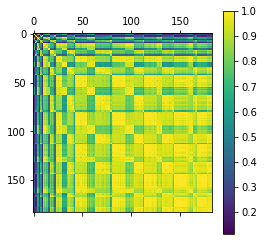


gram matrix with parameters {'p_quit': 0.20000000000000001} is: 

calculate kernels:   0%|          | 0/16836.0 [00:00<?, ?it/s]
calculate kernels:   0%|          | 5/16836.0 [00:00<06:53, 40.74it/s]
calculate kernels:   0%|          | 8/16836.0 [00:00<07:50, 35.79it/s]
calculate kernels:   0%|          | 11/16836.0 [00:00<08:48, 31.86it/s]
calculate kernels:   0%|          | 23/16836.0 [00:00<12:26, 22.52it/s]

Exception in thread Thread-4:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/usr/local/lib/python3.5/dist-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/usr/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



calculate kernels: 100%|██████████| 16836/16836.0 [1:46:43<00:00,  1.47it/s]
 --- marginalized kernel matrix of size 183 built in 6403.860609769821 seconds ---

[[ 1.          0.77431936  0.23044786 ...,  0.31951339  0.31935955
   0.31647445]
 [ 0.77431936  1.          0.20441831 ...,  0.28342371  0.28328725
   0.28072802]
 [ 0.23044786  0.20441831  1.         ...,  0.42016303  0.4182119
   0.43719159]
 ..., 
 [ 0.31951339  0.28342371  0.42016303 ...,  1.          0.999968
   0.99865875]
 [ 0.31935955  0.28328725  0.4182119  ...,  0.999968    1.          0.99840553]
 [ 0.31647445  0.28072802  0.43719159 ...,  0.99865875  0.99840553  1.        ]]


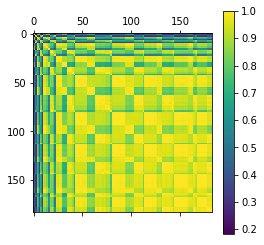


gram matrix with parameters {'p_quit': 0.30000000000000004} is: 
calculate kernels: 100%|██████████| 16836/16836.0 [1:49:18<00:00,  1.47it/s]  
 --- marginalized kernel matrix of size 183 built in 6559.1021230220795 seconds ---
[[ 1.          0.8408897   0.32640042 ...,  0.43422274  0.43379622
   0.43375138]
 [ 0.8408897   1.          0.26207831 ...,  0.34865261  0.34831015
   0.34827414]
 [ 0.32640042  0.26207831  1.         ...,  0.53322928  0.53137761
   0.54559482]
 ..., 
 [ 0.43422274  0.34865261  0.53322928 ...,  1.          0.99998698
   0.99941502]
 [ 0.43379622  0.34831015  0.53137761 ...,  0.99998698  1.          0.99931551]
 [ 0.43375138  0.34827414  0.54559482 ...,  0.99941502  0.99931551  1.        ]]


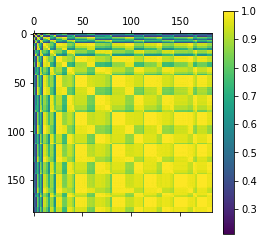


gram matrix with parameters {'p_quit': 0.40000000000000002} is: 

calculate kernels:   0%|          | 0/16836.0 [00:00<?, ?it/s]
calculate kernels:   0%|          | 5/16836.0 [00:00<06:52, 40.78it/s]
calculate kernels:   0%|          | 14/16836.0 [00:00<09:52, 28.41it/s]

Exception in thread Thread-6:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/usr/local/lib/python3.5/dist-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/usr/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



calculate kernels: 100%|██████████| 16836/16836.0 [1:42:47<00:00,  1.45it/s]
 --- marginalized kernel matrix of size 183 built in 6167.1879296302795 seconds ---

[[ 1.          0.87992527  0.4096     ...,  0.53183212  0.53136236
   0.5326506 ]
 [ 0.87992527  1.          0.31083675 ...,  0.40359611  0.40323962
   0.40421723]
 [ 0.4096      0.31083675  1.         ...,  0.62445239  0.62295134
   0.63333087]
 ..., 
 [ 0.53183212  0.40359611  0.62445239 ...,  1.          0.99999372
   0.99971846]
 [ 0.53136236  0.40323962  0.62295134 ...,  0.99999372  1.          0.99966936]
 [ 0.5326506   0.40421723  0.63333087 ...,  0.99971846  0.99966936  1.        ]]


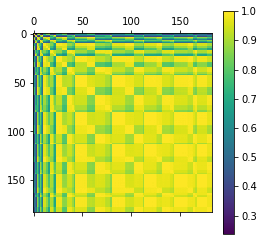


gram matrix with parameters {'p_quit': 0.5} is: 
calculate kernels: 100%|██████████| 16836/16836.0 [1:43:19<00:00,  1.47it/s]
 --- marginalized kernel matrix of size 183 built in 6199.830270290375 seconds ---
[[ 1.          0.90464676  0.48       ...,  0.6133451   0.61295001
   0.6145831 ]
 [ 0.90464676  1.          0.35164363 ...,  0.44933104  0.44904159
   0.45023798]
 [ 0.48        0.35164363  1.         ...,  0.69841949  0.69732936
   0.70457945]
 ..., 
 [ 0.6133451   0.44933104  0.69841949 ...,  1.          0.99999665
   0.99985882]
 [ 0.61295001  0.44904159  0.69732936 ...,  0.99999665  1.          0.99983035]
 [ 0.6145831   0.45023798  0.70457945 ...,  0.99985882  0.99983035  1.        ]]


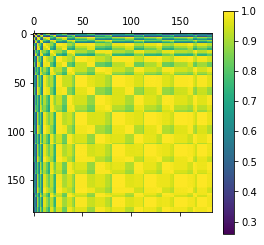


gram matrix with parameters {'p_quit': 0.59999999999999998} is: 

calculate kernels:   0%|          | 0/16836.0 [00:00<?, ?it/s]
calculate kernels:   0%|          | 5/16836.0 [00:00<06:48, 41.18it/s]
calculate kernels:   0%|          | 8/16836.0 [00:00<07:47, 36.03it/s]
calculate kernels:   0%|          | 11/16836.0 [00:00<08:42, 32.18it/s]
calculate kernels:   0%|          | 14/16836.0 [00:00<09:48, 28.56it/s]
calculate kernels:   0%|          | 17/16836.0 [00:00<11:18, 24.78it/s]
calculate kernels:   0%|          | 20/16836.0 [00:00<11:23, 24.59it/s]
calculate kernels:   0%|          | 23/16836.0 [00:00<12:15, 22.87it/s]
calculate kernels:   0%|          | 26/16836.0 [00:01<12:43, 22.01it/s]
calculate kernels:   0%|          | 29/16836.0 [00:01<13:27, 20.81it/s]
calculate kernels:   0%|          | 31/16836.0 [00:01<14:38, 19.14it/s]
calculate kernels:   0%|          | 33/16836.0 [00:01<15:52, 17.65it/s]
calculate kernels:   0%|          | 35/16836.0 [00:01<16:25, 17.05it/s]
calculat

Exception in thread Thread-7:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/usr/local/lib/python3.5/dist-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/usr/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



calculate kernels: 100%|██████████| 16836/16836.0 [1:41:44<00:00,  1.48it/s]
 --- marginalized kernel matrix of size 183 built in 6104.786992549896 seconds ---

[[ 1.          0.92084364  0.5376     ...,  0.67938428  0.67910614
   0.68051945]
 [ 0.92084364  1.          0.38486347 ...,  0.48636568  0.48616656
   0.48717834]
 [ 0.5376      0.38486347  1.         ...,  0.7573247   0.75661569
   0.7613079 ]
 ..., 
 [ 0.67938428  0.48636568  0.7573247  ...,  1.          0.99999819
   0.999929  ]
 [ 0.67910614  0.48616656  0.75661569 ...,  0.99999819  1.          0.99991171]
 [ 0.68051945  0.48717834  0.7613079  ...,  0.999929    0.99991171  1.        ]]


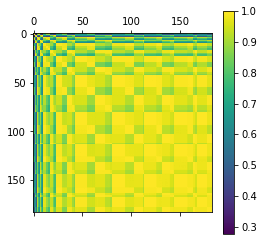


gram matrix with parameters {'p_quit': 0.70000000000000007} is: 
calculate kernels: 100%|██████████| 16836/16836.0 [1:43:44<00:00,  1.44it/s]
 --- marginalized kernel matrix of size 183 built in 6225.047295093536 seconds ---
[[ 1.          0.93146048  0.5824     ...,  0.73036764  0.73020428
   0.73115317]
 [ 0.93146048  1.          0.41064428 ...,  0.51497474  0.51485956
   0.51552861]
 [ 0.5824      0.41064428  1.         ...,  0.80233943  0.80194044
   0.80461114]
 ..., 
 [ 0.73036764  0.51497474  0.80233943 ...,  1.          0.99999909
   0.99996617]
 [ 0.73020428  0.51485956  0.80194044 ...,  0.99999909  1.          0.9999564 ]
 [ 0.73115317  0.51552861  0.80461114 ...,  0.99996617  0.9999564   1.        ]]


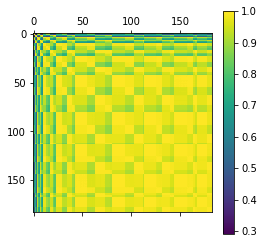


gram matrix with parameters {'p_quit': 0.80000000000000004} is: 

calculate kernels:   0%|          | 0/16836.0 [00:00<?, ?it/s]
calculate kernels:   0%|          | 5/16836.0 [00:00<06:50, 40.97it/s]
calculate kernels:   0%|          | 8/16836.0 [00:00<07:50, 35.77it/s]
calculate kernels:   0%|          | 11/16836.0 [00:00<08:47, 31.87it/s]
calculate kernels:   0%|          | 14/16836.0 [00:00<09:55, 28.27it/s]
calculate kernels:   0%|          | 17/16836.0 [00:00<11:22, 24.63it/s]
calculate kernels:   0%|          | 20/16836.0 [00:00<11:25, 24.54it/s]
calculate kernels:   0%|          | 23/16836.0 [00:00<12:20, 22.69it/s]
calculate kernels:   0%|          | 26/16836.0 [00:01<12:50, 21.81it/s]
calculate kernels:   0%|          | 29/16836.0 [00:01<13:32, 20.68it/s]
calculate kernels:   0%|          | 31/16836.0 [00:01<14:44, 18.99it/s]
calculate kernels:   0%|          | 33/16836.0 [00:01<16:06, 17.39it/s]
calculate kernels:   0%|          | 35/16836.0 [00:01<16:36, 16.87it/s]
calculat

Exception in thread Thread-8:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/usr/local/lib/python3.5/dist-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/usr/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



calculate kernels: 100%|██████████| 16836/16836.0 [1:42:54<00:00,  1.46it/s]
 --- marginalized kernel matrix of size 183 built in 6174.926059484482 seconds ---

[[ 1.          0.9381379   0.6144     ...,  0.76658748  0.76651379
   0.76698253]
 [ 0.9381379   1.          0.42904385 ...,  0.53531843  0.53526696
   0.53559429]
 [ 0.6144      0.42904385  1.         ...,  0.83412902  0.83395285
   0.83515141]
 ..., 
 [ 0.76658748  0.53531843  0.83412902 ...,  1.          0.99999963
   0.99998645]
 [ 0.76651379  0.53526696  0.83395285 ...,  0.99999963  1.          0.99998201]
 [ 0.76698253  0.53559429  0.83515141 ...,  0.99998645  0.99998201  1.        ]]


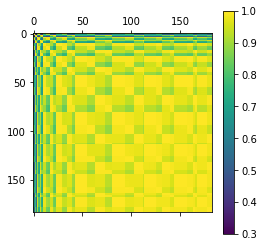


gram matrix with parameters {'p_quit': 0.90000000000000002} is: 
calculate kernels: 100%|██████████| 16836/16836.0 [1:42:56<00:00,  1.47it/s]
 --- marginalized kernel matrix of size 183 built in 6176.7943415641785 seconds ---
[[ 1.          0.94181611  0.6336     ...,  0.78824197  0.7882235
   0.78834754]
 [ 0.94181611  1.          0.44008114 ...,  0.5474912   0.54747837
   0.54756452]
 [ 0.6336      0.44008114  1.         ...,  0.85307284  0.8530291
   0.85333062]
 ..., 
 [ 0.78824197  0.5474912   0.85307284 ...,  1.          0.99999991
   0.99999679]
 [ 0.7882235   0.54747837  0.8530291  ...,  0.99999991  1.          0.99999566]
 [ 0.78834754  0.54756452  0.85333062 ...,  0.99999679  0.99999566  1.        ]]


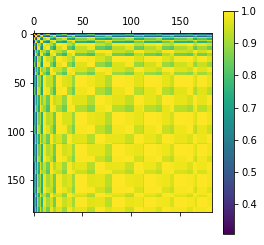


9 gram matrices are calculated, 0 of which are ignored.

3. Fitting and predicting using nested cross validation. This could really take a while...

calculate performance:   0%|          | 0/11070 [00:00<?, ?it/s]
                                                             
calculate performance:   0%|          | 2/11070 [00:00<15:40, 11.77it/s]
                                                                     

/home/ljia/.local/lib/python3.5/site-packages/sklearn/linear_model/ridge.py:154: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "




calculate performance:   0%|          | 4/11070 [00:00<15:41, 11.76it/s]
                                                                     

calculate performance:   0%|          | 6/11070 [00:00<15:44, 11.72it/s]
                                                                     

calculate performance:   0%|          | 8/11070 [00:00<15:41, 11.75it/s]
                                                                     

calculate performance:   0%|          | 10/11070 [00:00<15:40, 11.76it/s]
                                                                      

calculate performance:   0%|          | 12/11070 [00:01<15:40, 11.76it/s]
                                                                      

calculate performance:   0%|          | 14/11070 [00:01<15:41, 11.74it/s]
                                                                      

calculate performance:   0%|          | 16/11070 [00:01<15:38, 11.78it/s]
                                                      

Exception in thread Thread-9:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/usr/local/lib/python3.5/dist-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/usr/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



                                                                            
4. Getting final performances...
best_params_out:  [{'p_quit': 0.10000000000000001}]
best_params_in:  [{'alpha': 0.0005623413251903491}]

best_val_perf:  26.062653165
best_val_std:  1.8303539525
final_performance:  26.8380192095
final_confidence:  4.81048260006
train_performance:  20.6534557877
train_std:  0.444474306713

time to calculate gram matrix with different hyperpapams: 6266.67±149.16
time to calculate best gram matrix:  6388.502187728882 s

params                                                train_perf      valid_perf      test_perf         gram_matrix_time
----------------------------------------------------  --------------  --------------  --------------  ------------------
{'p_quit': 0.10000000000000001, 'alpha': '1.00e-05'}  25.69±37.46     320.73±1476.47  144.12±515.91              6388.5
{'p_quit': 0.20000000000000001, 'alpha': '1.00e-05'}  20.68±1.75      51.88±46.68     43.91±60.09         

calculate performance: 100%|██████████| 11070/11070 [07:58<00:00, 23.15it/s]


In [1]:
%load_ext line_profiler
%matplotlib inline
import numpy as np
import sys
sys.path.insert(0, "../")
from pygraph.utils.model_selection_precomputed import model_selection_for_precomputed_kernel
from pygraph.kernels.marginalizedKernel import marginalizedkernel

datafile = '../../../../datasets/acyclic/Acyclic/dataset_bps.ds'
estimator = marginalizedkernel
param_grid_precomputed = {'p_quit': np.linspace(0.1, 0.9, 9)}
param_grid = {'alpha': np.logspace(-5, 5, num = 41, base = 10)}

model_selection_for_precomputed_kernel(datafile, estimator, param_grid_precomputed, param_grid, 
                                       'regression', NUM_TRIALS=30)

In [2]:
%load_ext line_profiler

import numpy as np
import sys
sys.path.insert(0, "../")
from pygraph.utils.utils import kernel_train_test
from pygraph.kernels.marginalizedKernel import marginalizedkernel, _marginalizedkernel_do

datafile = '../../../../datasets/acyclic/Acyclic/dataset_bps.ds'
kernel_file_path = 'kernelmatrices_weisfeilerlehman_subtree_acyclic/'

kernel_para = dict(node_label = 'atom', edge_label = 'bond_type', itr = 20)

kernel_train_test(datafile, kernel_file_path, marginalizedkernel, kernel_para, \
    hyper_name = 'p_quit', hyper_range = np.linspace(0.1, 0.9, 9), normalize = False)

# %lprun -f _marginalizedkernel_do \
#     kernel_train_test(datafile, kernel_file_path, marginalizedkernel, kernel_para, \
#     hyper_name = 'p_quit', hyper_range = np.linspace(0.1, 0.9, 9), normalize = False)

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler

 --- This is a regression problem ---


 #--- calculating kernel matrix when p_quit = 0.1 ---#

 Loading dataset from file...

 Calculating kernel matrix, this could take a while...

 --- marginalized kernel matrix of size 185 built in 258.76952958106995 seconds ---
[[ 0.0287062   0.0124634   0.00444444 ...,  0.00606061  0.00606061
   0.00606061]
 [ 0.0124634   0.01108958  0.00333333 ...,  0.00454545  0.00454545
   0.00454545]
 [ 0.00444444  0.00333333  0.0287062  ...,  0.00819912  0.00819912
   0.00975875]
 ..., 
 [ 0.00606061  0.00454545  0.00819912 ...,  0.02846735  0.02836907
   0.02896354]
 [ 0.00606061  0.00454545  0.00819912 ...,  0.02836907  0.02831424
   0.0288712 ]
 [ 0.00606061  0.00454545  0.00975875 ...,  0.02896354  0.0288712
   0.02987915]]

 Saving kernel matrix to file...

 Mean performance on train set: 12.186285
With standard deviation: 7.038988

 Mean performance on test s


 Mean performance on train set: 25.808155
With standard deviation: 3.312074

 Mean performance on test set: 24.424089
With standard deviation: 4.951191


  p_quit    RMSE_test    std_test    RMSE_train    std_train    k_time
--------  -----------  ----------  ------------  -----------  --------
     0.1      18.0243     6.29247       12.1863      7.03899   258.77
     0.2      18.3376     5.85454       13.9554      7.54407   256.327
     0.3      18.496      5.73492       13.9391      7.95812   255.614
     0.4      19.4491     5.3713        16.2593      6.69358   254.897
     0.5      19.7857     5.55054       17.0181      6.84437   256.757
     0.6      20.1922     5.59122       17.6618      6.56718   256.557
     0.7      21.6614     6.02685       20.5882      5.74601   254.953
     0.8      22.996      6.08347       23.5943      3.80637   252.804
     0.9      24.4241     4.95119       25.8082      3.31207   256.738


In [ ]:
# results

# with y normalization
  p_quit    RMSE_test    std_test    RMSE_train    std_train    k_time
--------  -----------  ----------  ------------  -----------  --------
     0.1      18.0192     6.27867       12.1642      6.99821   266.905
     0.2      18.3374     5.84775       13.9376      7.51398   256.288
     0.3      18.4955     5.73774       13.9291      7.9416    254.441
     0.4      19.4498     5.37509       16.2538      6.68378   257.581
     0.5      19.7851     5.55018       17.0142      6.83653   248.562
     0.6      20.1911     5.58951       17.6595      6.56211   249.667
     0.7      21.6606     6.02589       20.5872      5.74395   243.046
     0.8      22.9959     6.08344       23.5941      3.80595   252.36
     0.9      24.424      4.9512        25.8082      3.31202   248.077

# without y normalization
  p_quit    RMSE_test    std_test    RMSE_train    std_train    k_time
--------  -----------  ----------  ------------  -----------  --------
     0.1      18.0243     6.29247       12.1863      7.03899   258.77
     0.2      18.3376     5.85454       13.9554      7.54407   256.327
     0.3      18.496      5.73492       13.9391      7.95812   255.614
     0.4      19.4491     5.3713        16.2593      6.69358   254.897
     0.5      19.7857     5.55054       17.0181      6.84437   256.757
     0.6      20.1922     5.59122       17.6618      6.56718   256.557
     0.7      21.6614     6.02685       20.5882      5.74601   254.953
     0.8      22.996      6.08347       23.5943      3.80637   252.804
     0.9      24.4241     4.95119       25.8082      3.31207   256.738

In [2]:
%load_ext line_profiler

import numpy as np
import sys
sys.path.insert(0, "../")
from pygraph.utils.utils import kernel_train_test
from pygraph.kernels.marginalizedKernel import marginalizedkernel, _marginalizedkernel_do

datafile = '../../../../datasets/acyclic/Acyclic/dataset_bps.ds'
kernel_file_path = 'kernelmatrices_weisfeilerlehman_subtree_acyclic/'

kernel_para = dict(node_label = 'atom', edge_label = 'bond_type', itr = 20, p_quit = 0.1)

# kernel_train_test(datafile, kernel_file_path, marginalizedkernel, kernel_para, \
#     hyper_name = 'p_quit', hyper_range = np.linspace(0.1, 0.9, 9), normalize = False)

%lprun -f _marginalizedkernel_do \
    kernel_train_test(datafile, kernel_file_path, marginalizedkernel, kernel_para, \
    normalize = False)


 --- This is a regression problem ---


 Loading dataset from file...

 Calculating kernel matrix, this could take a while...

 --- marginalized kernel matrix of size 185 built in 1133.0229969024658 seconds ---
[[ 0.0287062   0.0124634   0.00444444 ...,  0.00606061  0.00606061
   0.00606061]
 [ 0.0124634   0.01108958  0.00333333 ...,  0.00454545  0.00454545
   0.00454545]
 [ 0.00444444  0.00333333  0.0287062  ...,  0.00819912  0.00819912
   0.00975875]
 ..., 
 [ 0.00606061  0.00454545  0.00819912 ...,  0.02846735  0.02836907
   0.02896354]
 [ 0.00606061  0.00454545  0.00819912 ...,  0.02836907  0.02831424
   0.0288712 ]
 [ 0.00606061  0.00454545  0.00975875 ...,  0.02896354  0.0288712
   0.02987915]]

 Saving kernel matrix to file...

 Mean performance on train set: 12.186285
With standard deviation: 7.038988

 Mean performance on test set: 18.024312
With standard deviation: 6.292466


  rmse_test    std_test    rmse_train    std_train    k_time
-----------  ----------  ------------  

In [ ]:
Timer unit: 1e-06 s

Total time: 828.879 s
File: ../pygraph/kernels/marginalizedKernel.py
Function: _marginalizedkernel_do at line 67

Line #      Hits         Time  Per Hit   % Time  Line Contents
==============================================================
    67                                           def _marginalizedkernel_do(G1, G2, node_label, edge_label, p_quit, itr):
    68                                               """Calculate marginalized graph kernel between 2 graphs.
    69                                               
    70                                               Parameters
    71                                               ----------
    72                                               G1, G2 : NetworkX graphs
    73                                                   2 graphs between which the kernel is calculated.
    74                                               node_label : string
    75                                                   node attribute used as label.
    76                                               edge_label : string
    77                                                   edge attribute used as label.
    78                                               p_quit : integer
    79                                                   the termination probability in the random walks generating step.
    80                                               itr : integer
    81                                                   time of iterations to calculate R_inf.
    82                                                   
    83                                               Return
    84                                               ------
    85                                               kernel : float
    86                                                   Marginalized Kernel between 2 graphs.
    87                                               """
    88                                               # init parameters
    89     17205      12886.0      0.7      0.0      kernel = 0
    90     17205      52542.0      3.1      0.0      num_nodes_G1 = nx.number_of_nodes(G1)
    91     17205      28240.0      1.6      0.0      num_nodes_G2 = nx.number_of_nodes(G2)
    92     17205      15595.0      0.9      0.0      p_init_G1 = 1 / num_nodes_G1 # the initial probability distribution in the random walks generating step (uniform distribution over |G|)
    93     17205      11587.0      0.7      0.0      p_init_G2 = 1 / num_nodes_G2
    94                                           
    95     17205      11663.0      0.7      0.0      q = p_quit * p_quit
    96     17205      10728.0      0.6      0.0      r1 = q
    97                                           
    98                                               # initial R_inf
    99     17205      38412.0      2.2      0.0      R_inf = np.zeros([num_nodes_G1, num_nodes_G2]) # matrix to save all the R_inf for all pairs of nodes
   100                                           
   101                                               # calculate R_inf with a simple interative method
   102    344100     329235.0      1.0      0.0      for i in range(1, itr):
   103    326895     900354.0      2.8      0.1          R_inf_new = np.zeros([num_nodes_G1, num_nodes_G2])
   104    326895    2287346.0      7.0      0.3          R_inf_new.fill(r1)
   105                                           
   106                                                   # calculate R_inf for each pair of nodes
   107   2653464    3667117.0      1.4      0.4          for node1 in G1.nodes(data = True):
   108   2326569    7522840.0      3.2      0.9              neighbor_n1 = G1[node1[0]]
   109   2326569    3492118.0      1.5      0.4              p_trans_n1 = (1 - p_quit) / len(neighbor_n1) # the transition probability distribution in the random walks generating step (uniform distribution over the vertices adjacent to the current vertex)
   110  24024379   27775021.0      1.2      3.4              for node2 in G2.nodes(data = True):
   111  21697810   69471941.0      3.2      8.4                  neighbor_n2 = G2[node2[0]]
   112  21697810   32446626.0      1.5      3.9                  p_trans_n2 = (1 - p_quit) / len(neighbor_n2)    
   113                                           
   114  59095092   52545370.0      0.9      6.3                  for neighbor1 in neighbor_n1:
   115 104193150   92513935.0      0.9     11.2                      for neighbor2 in neighbor_n2:
   116                                           
   117                                                                   t = p_trans_n1 * p_trans_n2 * \
   118  66795868  285324518.0      4.3     34.4                              deltakernel(G1.node[neighbor1][node_label] == G2.node[neighbor2][node_label]) * \
   119  66795868  137934393.0      2.1     16.6                              deltakernel(neighbor_n1[neighbor1][edge_label] == neighbor_n2[neighbor2][edge_label])
   120  66795868  106834143.0      1.6     12.9                          R_inf_new[node1[0]][node2[0]] += t * R_inf[neighbor1][neighbor2] # ref [1] equation (8)
   121                                           
   122    326895    1123677.0      3.4      0.1          R_inf[:] = R_inf_new
   123                                           
   124                                               # add elements of R_inf up and calculate kernel
   125    139656     330283.0      2.4      0.0      for node1 in G1.nodes(data = True):
   126   1264441    1435263.0      1.1      0.2          for node2 in G2.nodes(data = True):                
   127   1141990    1377134.0      1.2      0.2              s = p_init_G1 * p_init_G2 * deltakernel(node1[1][node_label] == node2[1][node_label])
   128   1141990    1375456.0      1.2      0.2              kernel += s * R_inf[node1[0]][node2[0]] # ref [1] equation (6)
   129                                           
   130     17205      10801.0      0.6      0.0      return kernel